In [ ]:
!pip install librosa==0.10.1 matplotlib==3.7 scikit-learn==1.4.1.post1

In [1]:
from pathlib import Path

from IPython.display import Audio
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import sklearn.preprocessing

In [2]:
audio_path = Path("../data/ringtone.wav")

samples, sample_rate = librosa.load(audio_path, sr=None) # use the native sampling rate

samples.shape, sample_rate

((262094,), 44100)

# Algorithm hyperparameters

Remember that we deal with a sampled record. The sampling rate is the number of waveform samples we take in a second: a typical value is `44.1 KHz` sample rate.

The following hyperparameters control how the Short-time Fourier Transform (STFT) is computed:

- `fmin`: minimum frequency
- `fmax`: maximum frequency
- `n_mels`: number of frequency bands (Mel bins)
- `n_fft`: window length for each time section
- `hop_length`: number of samples to slide the window for the FFT at each step.

Final spectrogram image resolution is: (`Num samples / hop_length`, `n_mels`)


# Mel Frequency Cepstral Coefficients (MFCC)

Link to [Wikipedia](https://en.wikipedia.org/wiki/Mel-frequency_cepstrum) article.

Extra processing step of the MEL transform, to adapt the frequency bands to the most common frequency spoken by humans.

This might be useful in applications like voice recognition, speech to text or text to speech.

In [19]:
mfcc = librosa.feature.mfcc(y=samples, sr=sample_rate)
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
mfcc.shape

/home/marco/Work/OKRs/ml-audio-study/env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:261: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/marco/Work/OKRs/ml-audio-study/env/lib/python3.10/site-packages/sklearn/preprocessing/_data.py:280: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


(20, 512)

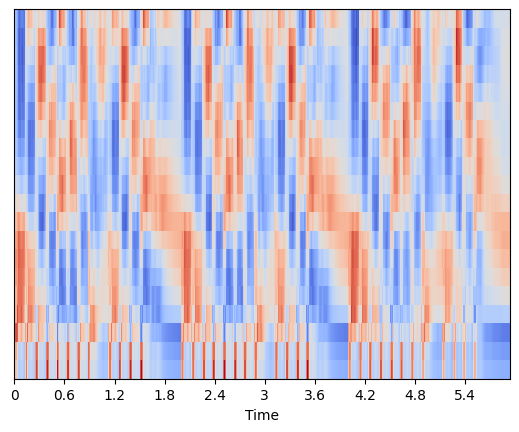

In [20]:
librosa.display.specshow(mfcc, sr=sample_rate, x_axis='time')

In [ ]:

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)